## Blur Digit Prediction Game

In [1]:
from sklearn.datasets import load_digits
from sklearn import svm, metrics
digits = load_digits()
x = digits.data
y = digits.target
feature_names = digits.feature_names
#It shows the Numbers of that images which we are going to use 
target_names = digits.target_names
print("Feature Names : " , feature_names)
print("Target Names : " , target_names)
print("\nFirst 10 rows of X:\n" , x[:10])

Feature Names :  ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']
Target Names :  [0 1 2 3 4 5 6 7 8 9]

First 10 rows of X:
 [[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11

<Figure size 640x480 with 0 Axes>

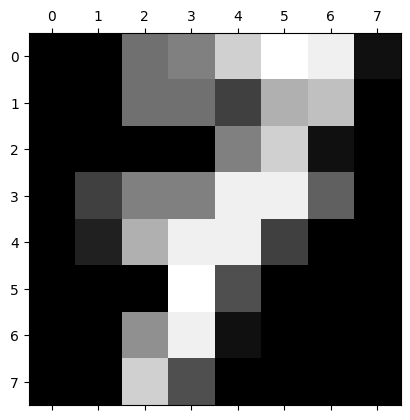

In [2]:
from random import randint
import matplotlib.pyplot as plt
plt.gray()

v = randint(0,9)
#Display All the pictures we are going to use
plt.matshow(digits.images[v])
plt.show()

In [3]:
expect = int(input("Predict the above ****BLUR***** Number : "))

if(v == expect):
    print("Congratrulations !!! You Predicted the correct Number ...")
else:
    print("You Predicted the worng one .... Please try again")

Predict the above ****BLUR***** Number : 7
Congratrulations !!! You Predicted the correct Number ...


In [4]:
# flatten the images
from sklearn.model_selection import train_test_split
new_samples = len(digits.images)
data = digits.images.reshape((new_samples, -1))

# Create a classifier: a support vector classifier
classify = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=True
)

# Learn the digits on the train subset
classify.fit(X_train, y_train)

# Prediction is under way by the model
predicted = classify.predict(X_test)

Confusion matrix:
[[ 88   0   0   0   0   0   0   0   0   0]
 [  0  92   0   0   0   0   0   0   0   0]
 [  0   0  90   0   0   0   0   1   0   0]
 [  0   0   0 107   0   1   0   0   0   0]
 [  0   0   0   0  97   0   0   0   0   0]
 [  0   0   0   0   0  87   0   0   0   2]
 [  0   1   0   0   0   0  83   0   1   0]
 [  0   0   0   0   0   0   0  81   0   1]
 [  0   3   0   0   0   0   1   0  77   0]
 [  0   0   0   0   0   1   0   1   0  84]]


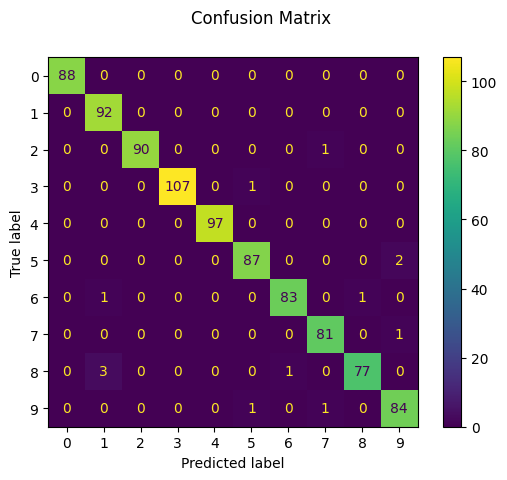

In [5]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
#Confusion Matric (difference between Original Value and Predicted value estimation by the model)
plt.show()